In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataMain = pd.read_csv('data.csv')

In [7]:
dataMain.head(10)
data=dataMain.head(10)
print(data)


  Weather Temperature Humidity  Wind Golf Play
0    fine         hot     high  none        no
1    fine         hot     high   few        no
2   cloud         hot     high  none       yes
3    rain        warm     high  none       yes
4    rain        cold   medium  none       yes
5    rain        cold   medium   few        no
6   cloud        cold   medium   few       yes
7    fine        warm     high  none        no
8    fine        cold   medium  none       yes
9    rain        warm   medium  none       yes


In [8]:
#Training  data set consists of the first 10 rows
target =data.values[:,4]
print(target)

['no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes']


In [9]:
#For target variable
c=0
P_yes,P_no=0,0
for i in target:
    c=c+1
    if i=='yes':
        P_yes=P_yes+1;
P_yes=P_yes/c
P_no=1-P_yes
print(P_yes," ",P_no)

0.6   0.4


In [10]:
#For class: Wind
Wind_none_y,Wind_none_n, Wind_few_y, Wind_few_n=0,0,0,0
n=0
m=0
counter=-1
var=data.values[:,3]
for i in var:
    counter=counter+1
    #print(target[counter])
    if i=='none':
        print(i)
        n=n+1
    if i=='none' and target[counter]=='yes':
        Wind_none_y=Wind_none_y+1    
    if i=='few':
        m=m+1
    if i=='few' and target[counter]=='yes':
        Wind_few_y=Wind_few_y+1
        
Wind_none_y=Wind_none_y/n
Wind_none_n=1-Wind_none_y
Wind_few_y=Wind_few_y/m
Wind_few_n=1-Wind_few_y

print(Wind_none_y," ",Wind_none_n)
print(Wind_few_y," ",Wind_few_n)


none
none
none
none
none
none
none
0.7142857142857143   0.2857142857142857
0.3333333333333333   0.6666666666666667


In [11]:
#For class: Humidity
Hu_high_y,Hu_high_n, Hu_medium_y, Hu_medium_n=0,0,0,0
n=0
m=0
counter=-1
var=data.values[:,2]
for i in var:
    counter=counter+1
    #print(target[counter])
    if i=='high':
        #print(i)
        n=n+1
    if i=='high' and target[counter]=='yes':
        Hu_high_y=Hu_high_y+1    
    if i=='medium':
        m=m+1
    if i=='medium' and target[counter]=='yes':
        Hu_medium_y=Hu_medium_y+1
Hu_high_y=Hu_high_y/n
Hu_high_n=1-Hu_high_y
Hu_medium_y=Hu_medium_y/m
Hu_medium_n=1-Hu_medium_y


In [12]:
#For class: Temperature
temp_hot_y, temp_hot_n, temp_warm_y, temp_warm_n, temp_cold_y, temp_cold_n=0,0,0,0,0,0
n=0
m=0
o=0
counter=-1
var=data.values[:,1]
print(var)
for i in var:
    counter=counter+1
    #print(target[counter])
    if i=='hot':
        #print(i)
        n=n+1
    if i=='hot' and target[counter]=='yes':
        temp_hot_y=temp_hot_y+1
    if i=='warm':
        m=m+1
        if target[counter]=='yes':
            temp_warm_y=temp_warm_y+1
    if i=='cold':
        o=o+1
        if target[counter]=='yes':
            temp_cold_y=temp_cold_y+1
temp_hot_y=temp_hot_y/n
temp_hot_n= 1-temp_hot_y
temp_warm_y=temp_warm_y/m
temp_warm_n=1-temp_warm_y
temp_cold_y=temp_cold_y/o
temp_cold_n=1-temp_cold_y

['hot' 'hot' 'hot' 'warm' 'cold' 'cold' 'cold' 'warm' 'cold' 'warm']


In [13]:
#For class: Weather
w_rain_y, w_rain_n, w_cloud_y, w_cloud_n, w_fine_y, w_fine_n=0,0,0,0,0,0
n=0
m=0
o=0
counter=-1
var=data.values[:,0]
print(var)
for i in var:
    counter=counter+1
    #print(target[counter])
    if i=='rain':
        #print(i)
        n=n+1
        if target[counter]=='yes':
            w_rain_y=w_rain_y+1
    if i=='cloud':
        m=m+1
        if target[counter]=='yes':
            w_cloud_y=w_cloud_y+1
    if i=='fine':
        o=o+1
        if target[counter]=='yes':
            w_fine_y=w_fine_y+1
w_rain_y=w_rain_y/n
w_rain_n=1-w_rain_y
w_cloud_y=w_cloud_y/m
w_cloud_n=1-w_cloud_y
w_fine_y=w_fine_y/o
w_fine_n=1-w_fine_y


['fine' 'fine' 'cloud' 'rain' 'rain' 'rain' 'cloud' 'fine' 'fine' 'rain']


In [16]:
#Prediction Based on the testing data set
dataTest=dataMain.tail(5) #Making the test dataset
print(dataTest)
wY =[]
tY =list()
hY =list()
wndY =list()
result =list()
pred=list()

print(dataTest.loc[10]['Weather'])


for i in range(10,15):
    wY.append(dataTest.loc[i-1]['Weather'])
    tY.append(dataTest.loc[i-1]['Temperature'])
    hY.append(dataTest.loc[i-1]['Humidity'])
    wndY.append(dataTest.loc[i-1]['Wind'])
    result.append(dataTest.loc[i-1]['Golf Play'])

    
    
for i in range(10,15):
    w0='w_'+wY[i-10]+'_'
    t0='temp_'+tY[i-10]+'_'
    h0='Hu_'+hY[i-10]+'_'
    wnd0='Wind_'+wndY[i-10]+'_'
    yes=eval(w0+'y')*eval(t0+'y')*eval(h0+'y')*eval(wnd0+'y')
    no=eval(w0+'n')*eval(t0+'n')*eval(h0+'n')*eval(wnd0+'n')
    print("yes:",yes,"  no:",no)
    yes=P_yes*yes
    no=P_no*no
    if(yes>no):
        print("ITERATION",(i-10),"     PREDICTED: YES      ACTUAL: ",result[i-10])
        pred.append(1)
    else:
        print("ITERATION",(i-10),"     PREDICTED: NO      ACTUAL: ",result[i-10])
        pred.append(0)
    if(result[i-10]=='yes'):
        result[i-10]=1
    else:
        result[i-10]=0
   

   Weather Temperature Humidity  Wind Golf Play
9     rain        warm   medium  none       yes
10    fine        warm   medium   few       yes
11   cloud        warm     high   few       yes
12   cloud         hot   medium  none       yes
13    rain        warm     high   few        no
fine
yes: 0.28571428571428575   no: 0.0047619047619047615
ITERATION 0      PREDICTED: YES      ACTUAL:  yes
yes: 0.04444444444444444   no: 0.03333333333333333
ITERATION 1      PREDICTED: YES      ACTUAL:  yes
yes: 0.08888888888888888   no: 0.0
ITERATION 2      PREDICTED: YES      ACTUAL:  yes
yes: 0.19047619047619047   no: 0.0
ITERATION 3      PREDICTED: YES      ACTUAL:  yes
yes: 0.06666666666666667   no: 0.03333333333333334
ITERATION 4      PREDICTED: YES      ACTUAL:  no


In [37]:
print("LETS PREDICT WHETHER GOLF WILL BE PLAYED OR NOT")
w=input(" Enter weather conditions (fine/rain/cloud):  ")
t=input(" Enter temperature conditions (hot/warm/cold):  ")
h=input(" Enter humidity conditions (high/medium):  ")
wnd=input(" Enter wind conditions (none/few):  ")
wY='w_'+w+'_'
tY='temp_'+t+'_'
hY='Hu_'+h+'_'
wndY='Wind_'+wnd+'_'
print(Hu_high_y)
yes=eval(wY+'y')*eval(tY+'y')*eval(hY+'y')*eval(wndY+'y')
no=eval(wY+'n')*eval(tY+'n')*eval(hY+'n')*eval(wndY+'n')
print(yes)
print(no)
yes=P_yes*yes
no=P_no*no
print(yes)
print(no)

LETS PREDICT WHETHER GOLF WILL BE PLAYED OR NOT
 Enter weather conditions (fine/rain/cloud):  fine
 Enter temperature conditions (hot/warm/cold):  warm
 Enter humidity conditions (high/medium):  high
 Enter wind conditions (none/few):  few
0.4
0.02222222222222222
0.1
0.01333333333333333
0.04000000000000001


In [38]:
if(yes>no):
    print("GOLF WILL BE PLAYED")
else:
    print("GOLF WILL NOT BE PLAYED")

GOLF WILL NOT BE PLAYED


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result, pred)
print(cm)

[[0 1]
 [0 4]]


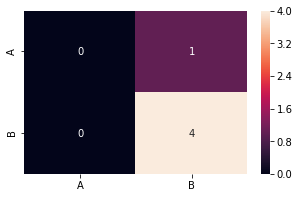

In [29]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (5,3))
sn.heatmap(df_cm, annot=True)

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(result, pred))

Accuracy: 0.8
